In [5]:
import pandas as pd

data = "Kuisioner_2.xlsx"
df = pd.read_excel(data, sheet_name="data")

df.head(5)


,pendapatan,produk_unik,harga_terjangkau,promo_diskon_pengaruh,banding_harga,rating,iklan_digital,campaign_influencer,lingkungan,desain_lebih_penting,kualitas_desain,loyal_brand,keyakinan,gaya_hidup
0,kompleks,netral,impulsif,impulsif,kompleks,netral,impulsif,impulsif,netral,kompleks,kompleks,netral,kompleks,netral
1,netral,netral,impulsif,impulsif,kompleks,kompleks,impulsif,impulsif,impulsif,kompleks,kompleks,kompleks,kompleks,kompleks
2,impulsif,kompleks,impulsif,impulsif,kompleks,kompleks,impulsif,impulsif,impulsif,netral,kompleks,kompleks,kompleks,kompleks
3,netral,netral,impulsif,impulsif,kompleks,netral,impulsif,impulsif,netral,kompleks,kompleks,netral,kompleks,netral
4,netral,netral,impulsif,impulsif,kompleks,netral,impulsif,impulsif,netral,netral,kompleks,netral,netral,netral


In [6]:
df = pd.read_excel(data, sheet_name="transform")

df.head(5)

,pendapatan,produk_unik,harga_terjangkau,promo_diskon_pengaruh,banding_harga,rating,iklan_digital,campaign_influencer,lingkungan,desain_lebih_penting,kualitas_desain,loyal_brand,keyakinan,gaya_hidup,kelas,kelas_angka
0,1,0,-1,-1,1,0,-1,-1,0,1,1,0,1,0,kompleks,1
1,0,0,-1,-1,1,1,-1,-1,-1,1,1,1,1,1,kompleks,1
2,-1,1,-1,-1,1,1,-1,-1,-1,0,1,1,1,1,kompleks,1
3,0,0,-1,-1,1,0,-1,-1,0,1,1,0,1,0,netral,0
4,0,0,-1,-1,1,0,-1,-1,0,0,1,0,0,0,netral,0


In [42]:
# Find optimal Parameters Regulation
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

D:\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [84]:
import joblib
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# load data
data = "Kuisioner_2.xlsx"
df = pd.read_excel(data, sheet_name="transform")

# Feature Initial
X = df.drop(['kelas_angka'], axis=1)
y = df['kelas_angka']

# Data normalization use scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data training
model = SVC(C=grid.best_params_['C'], gamma=grid.best_params_['gamma'], kernel='rbf')
model.fit(X_train, y_train)


predictions = model.predict(X_train)
y_train_pred = model.predict(X_train)

print("Accuracy: ")
print(accuracy_score(y_train, predictions))

print("Confusion Matrix: ")
print(confusion_matrix(y_train, predictions))

print("Classification Report: ")
print(classification_report(y_train, predictions))

print(y_train_pred)
# Simpan model 
#joblib.dump(model, 'model_rbf.pkl')
#joblib.dump(scaler, 'scaler_rbf.pkl')

Accuracy: 
0.8148148148148148
Confusion Matrix: 
[[ 3  1  2]
 [ 0 12  0]
 [ 0  2  7]]
Classification Report: 
              precision    recall  f1-score   support

          -1       1.00      0.50      0.67         6
           0       0.80      1.00      0.89        12
           1       0.78      0.78      0.78         9

    accuracy                           0.81        27
   macro avg       0.86      0.76      0.78        27
weighted avg       0.84      0.81      0.80        27

[ 0  0  0  0  0  0 -1  0  0  1  1  1  0 -1 -1  0  0  1  1  0  1  0  1  1
  0  0  1]


D:\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


0   -1
1   -1
2   -1
3   -1
4   -1
5    1
6    0
7    0
8    1
9    1
Name: prediksi, dtype: int64
Accuracy
0.9
Confusion Matrix
[[5 0 0]
 [0 1 0]
 [0 1 3]]
Classification Report
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         5
           0       0.50      1.00      0.67         1
           1       1.00      0.75      0.86         4

    accuracy                           0.90        10
   macro avg       0.83      0.92      0.84        10
weighted avg       0.95      0.90      0.91        10

prediksi
-1    50.0
 1    30.0
 0    20.0
Name: proportion, dtype: float64


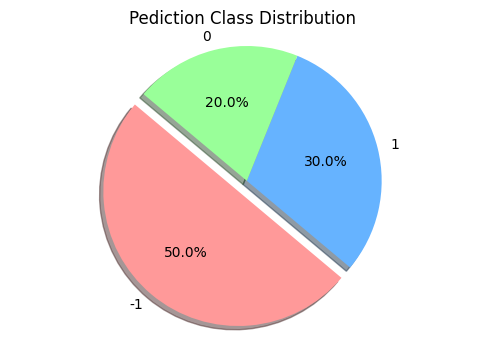

In [87]:
import joblib
from joblib import load
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# call data training model
model = load('model_rbf.pkl')
scaler = load('scaler_rbf.pkl')

# load_data testing
df = pd.read_excel('Kuisioner_2.xlsx', sheet_name='data_testing')

# feature
fitur_columns = ['fitur_1', 'fitur_2', 'fitur_3', 'fitur_4', 'fitur_5', 'fitur_6','fitur_7', 
                 'fitur_8', 'fitur_9', 'fitur_10', 'fitur_11', 'fitur_12','fitur_13', 'fitur_14']
X_test = df[fitur_columns]

#normalisasi
X_test_scaled = scaler.transform(X_test)

# prediction
y_pred = model.predict(X_test_scaled)

# add to dataframe
df['prediksi'] = y_pred
print(df['prediksi'])

# comparing with old prediction
if 'kelas_angka' in df.columns:
    y_true = df['kelas_angka']
    
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy")
    print(accuracy)
    
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix")
    print(conf_matrix)
    
    class_report = classification_report(y_true, y_pred)
    print("Classification Report")
    print(class_report)
else:
    print("'kelas_angka' tidak ditemukan")
    
pred_counts = df['prediksi'].value_counts(normalize=True)*100
print(pred_counts)

labels = pred_counts.index
sizes = pred_counts.values
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)

plt.figure(figsize=(6, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pediction Class Distribution')
plt.axis('equal')
plt.show()